In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

High SNR

In [2]:
# Process true data
with open('true-Poisson-high_SNR.txt', 'r') as f:
    file = f.readlines()
    
x_true = []
y_true = []

for line in file:
    proc = line[:-2].strip().split('  ')
    x_true.append(float(proc[-1]))
    y_true.append(float(proc[0]))
    
x_true = np.array(x_true)
y_true = np.array(y_true)

In [3]:
# With size specified as 2 px
with open('tm_2_poisson_high_SNR.csv', 'r') as f:
    file = f.readlines()
    
x_est = []
y_est = []

for line in file:
    x, y = line.split(',')
    x_est.append(float(x))
    y_est.append(float(y[:-2]))
    
x_est = np.array(x_est)
y_est = np.array(y_est)

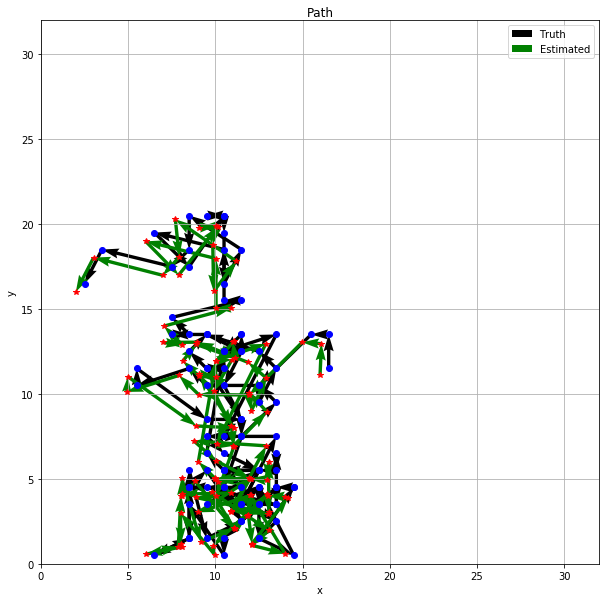

In [4]:
# Plot points and tracks
plt.figure(figsize=(10, 10))
plt.quiver(x_true[:-1], y_true[:-1], x_true[1:]-x_true[:-1], y_true[1:]-y_true[:-1], scale_units='xy', angles='xy', scale=1, label='Truth')
plt.plot(x_true, y_true, 'bo')
plt.quiver(x_est[:-1], y_est[:-1], x_est[1:]-x_est[:-1], y_est[1:]-y_est[:-1], scale_units='xy', angles='xy', scale=1, color='g', label='Estimated')
plt.plot(x_est, y_est, 'r*')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Path')
plt.xlim([0,32])
plt.ylim([0,32])
plt.legend()
plt.show()

In [5]:
# Collect statistics for maximum displacement per time step
print max(x_true[1:]-x_true[:-1]), max(y_true[1:]-y_true[:-1])
print max(x_est[1:]-x_est[:-1]), max(y_est[1:]-y_est[:-1])

4.0 6.0
4.135 5.958


In [6]:
# MSE
print 'Mean Squared Error: ', ((x_true - x_est) ** 2).mean() + ((y_true - y_est) ** 2).mean()

Mean Squared Error:  0.49882645


In [7]:
# With size specified as 1 px
with open('tm_1_poisson_high_SNR.csv', 'r') as f:
    file = f.readlines()
    
x_est = []
y_est = []

for line in file:
    x, y = line.split(',')
    x_est.append(float(x))
    y_est.append(float(y[:-2]))
    
x_est = np.array(x_est)
y_est = np.array(y_est)

# MSE
print 'Mean Squared Error: ', ((x_true - x_est) ** 2).mean() + ((y_true - y_est) ** 2).mean()

Mean Squared Error:  0.58283505


Low SNR

In [10]:
# Process true data
with open('true-Poisson-low_SNR.txt', 'r') as f:
    file = f.readlines()
    
x_true = []
y_true = []

for line in file:
    proc = line[:-2].strip().split('  ')
    x_true.append(float(proc[-1]))
    y_true.append(float(proc[0]))
    
x_true = np.array(x_true)
y_true = np.array(y_true)

In [12]:
# With size specified as 2 px
with open('tm_2_poisson_low_SNR.csv', 'r') as f:
    file = f.readlines()
    
x_est = {}
y_est = {}

for line in file:
    track, x, y = line.split(',')
    try:
        x_est[int(track)] = np.append(x_est[int(track)], float(x))
        y_est[int(track)] = np.append(y_est[int(track)], float(y[:-2]))
    except KeyError:
        x_est[int(track)] = np.array([float(x)])
        y_est[int(track)] = np.array([float(y)])

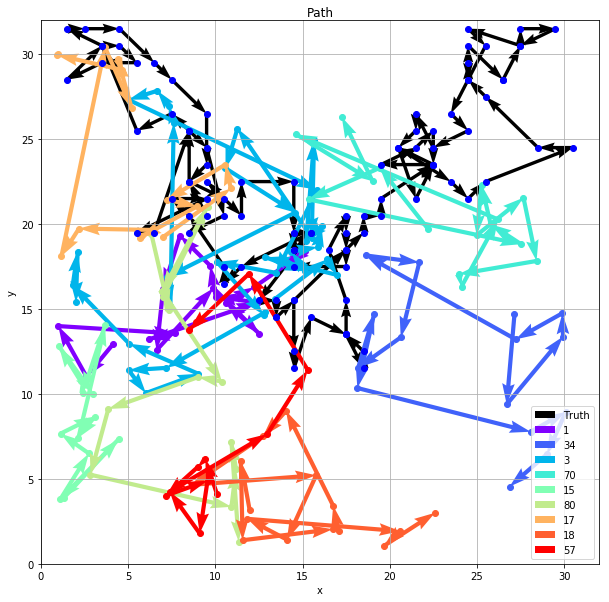

In [15]:
# Plot points and tracks
# Figure settings
plt.figure(figsize=(10, 10))
# Truth
plt.quiver(x_true[:-1], y_true[:-1], x_true[1:]-x_true[:-1], y_true[1:]-y_true[:-1], scale_units='xy', angles='xy', scale=1, label='Truth')
plt.plot(x_true, y_true, 'bo')
# Estimates
color=iter(cm.rainbow(np.linspace(0,1,len(x_est))))
for key in x_est:
    c=next(color)
    plt.quiver(x_est[key][:-1], y_est[key][:-1], x_est[key][1:]-x_est[key][:-1], y_est[key][1:]-y_est[key][:-1], scale_units='xy', angles='xy', scale=1, color=c, label=key)
    plt.scatter(x_est[key], y_est[key], color=c)
# Remaining settings
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Path')
plt.xlim([0,32])
plt.ylim([0,32])
plt.legend()
plt.show()